In [1]:
import numpy as np
from astropy import units #import Quantity
from astropy import constants as const
from astropy.time import Time
from astropy.coordinates import Angle, SkyCoord, EarthLocation, AltAz
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import clear_output
rc('text', usetex=True)
rc('font', family='serif')
rc('font',size=16)

In [2]:
def progress_bar(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [ ]:
# Define the reference time and location
mcmurdo = EarthLocation(lat='-77.8419', lon='166.6863', height=37000.)
time0 = Time('2019-12-15 18:00:00', scale='utc', location = mcmurdo)

In [ ]:
# Define what a single scan looks like, centered on a given central pointing position
# (which could be a vector)
def AzScan(target, dt = np.power(488*units.Hz,-1)):
    

In [5]:
dt = 5.*units.second
times = time0 + np.arange(0,24,dt.to(units.hr).value)*units.hr
t_sec = ((times.jd-times.jd[0])*units.day).to(units.second)
print(times.shape)

(17280,)


In [6]:
az_scan_rate = 0.1*units.degree/(1.0*units.second)
az_scan_extent = 1.0*units.degree
az_scans = np.zeros_like(t_sec.value)*units.degree
az_scans[0] = -az_scan_extent/2.
scan_dir = 1
daz = az_scan_rate*dt

In [7]:
%%time
target_field = SkyCoord(ra=45.*units.degree,dec=-55*units.degree, obstime=times, location=mcmurdo)
target_field_altaz = target_field.transform_to('altaz')

CPU times: user 2.86 s, sys: 143 ms, total: 3.01 s
Wall time: 3.06 s


In [10]:
target_field.

Object `target_field.pm_dec` not found.


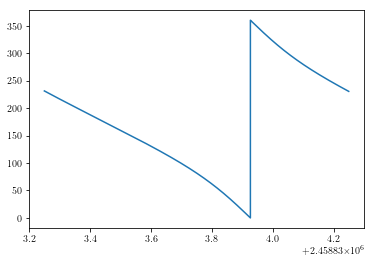

In [99]:
plt.plot(times.jd,target_field_altaz.az.deg)

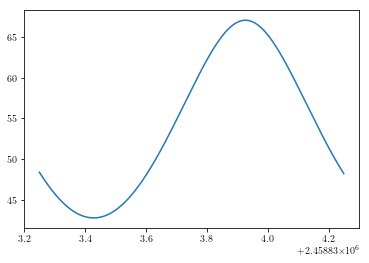

In [100]:
plt.plot(times.jd,target_field_altaz.alt.deg)

In [101]:
%%time
for i in np.arange(len(az_scans)-1):
    # if on the next step you would exceed the extent in the positive direction, reverse course
    if az_scans[i-1] > (az_scan_extent/2.-daz): 
        scan_dir = -1
    if az_scans[i-1] < (-az_scan_extent/2.+daz): 
        scan_dir = 1
    az_scans[i] = az_scans[i-1] + scan_dir*daz

CPU times: user 13.3 s, sys: 51.9 ms, total: 13.3 s
Wall time: 13.4 s


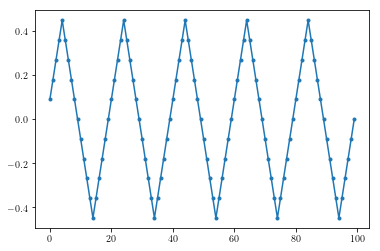

In [102]:
plt.plot(az_scans[0:100],'.-')

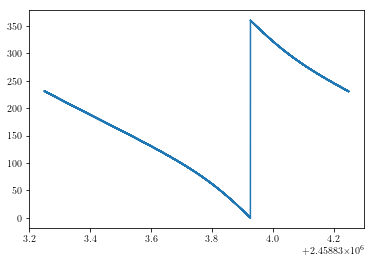

In [103]:
plt.plot(times.jd,target_field_altaz.az+az_scans)

In [104]:
pointing = SkyCoord(alt = target_field_altaz.alt, 
                az = target_field_altaz.az+az_scans, 
                frame = 'altaz', 
                obstime = times, 
                location = mcmurdo)

In [105]:
%%time
pointing_radec = pointing.transform_to('icrs')

CPU times: user 10.4 s, sys: 72.8 ms, total: 10.5 s
Wall time: 10.2 s


In [114]:
ra_off = pointing_radec.ra - target_field.ra
dec_off = pointing_radec.dec - target_field.dec

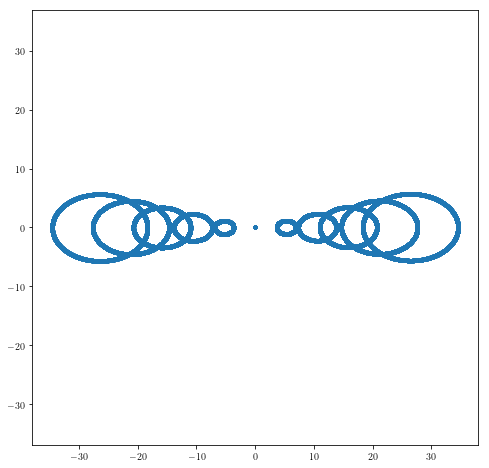

In [116]:
plt.figure(figsize=[8,8])
plt.plot(ra_off.to(units.arcmin), dec_off.to(units.arcmin), '.')
plt.axis('equal')
plt.show()

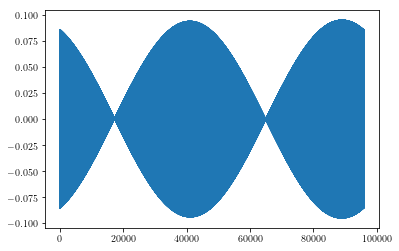

In [117]:
plt.plot(dec_off)

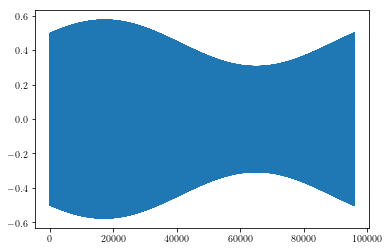

In [118]:
plt.plot(ra_off)